In [2]:
#random quicksort 
import random

def quicksort(s):
    if len(s) <= 1:
        return s
    else:
        pivot = random.choice(s)
        less = [x for x in s if x < pivot]
        equal = [x for x in s if x == pivot]
        greater = [x for x in s if x > pivot]
        return quicksort(less) + equal + quicksort(greater)

# Example usage:
a = [1, 8, 7, 4, 5, 9, 2, 6, 5, 2, 5]
sorted_a = quicksort(a)
print(sorted_a)


[1, 2, 2, 4, 5, 5, 5, 6, 7, 8, 9]


In [4]:
def quicksort(arr, start, end):
    if end - start < 2:
        return

    index = start
    for i in range(start + 1, end):
        if arr[i] < arr[index]:
            arr[i], arr[index + 1] = arr[index + 1], arr[i]
            index += 1

    arr[index], arr[end - 1] = arr[end - 1], arr[index]

    quicksort(arr, start, index)
    quicksort(arr, index + 1, end)

x= [12, 4, 5, 6, 7, 3, 1, 15]
quicksort(x, 0, len(x))
print("Sorted array:", x)


Sorted array: [12, 4, 3, 15, 7, 5, 6, 1]


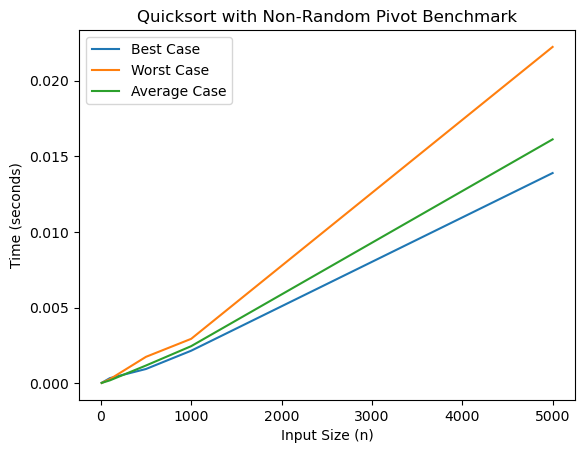

In [5]:
import timeit
import random

def partition(array, start, end):
    index = median(array, start, end)
    array[index], array[end] = array[end], array[index]
    pivot = array[end]

    i = start - 1
    for j in range(start, end):
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]

    array[i + 1], array[end] = array[end], array[i + 1]
    return i + 1

def median(array, start, end):
    mid = (start + end) // 2
    if array[start] > array[mid]:
        array[start], array[mid] = array[mid], array[start]
    if array[start] > array[end]:
        array[start], array[end] = array[end], array[start]
    if array[mid] > array[end]:
        array[mid], array[end] = array[end], array[mid]
    return mid

def quicksort(array, start, end):
    if start < end:
        index = partition(array, start, end)
        quicksort(array, start, index - 1)
        quicksort(array, index + 1, end)

def best_case(n):
    return list(range(1, n + 1))

def worst_case(n):
    return list(range(n, 0, -1))

def average_case(n):
    return random.sample(range(1, n + 1), n)

def benchmark(sort_function, input_generator, input_sizes, repetitions=5):
    results = []

    for size in input_sizes:
        input_data = input_generator(size)
        time_taken = timeit.timeit(lambda: sort_function(input_data.copy(), 0, size - 1), number=repetitions)
        avg_time_taken = time_taken / repetitions
        results.append(avg_time_taken)

    return results

import matplotlib.pyplot as plt

input_sizes = [10, 100, 500, 1000, 5000]
bestcase_times = benchmark(quicksort, best_case, input_sizes)
worstcase_times = benchmark(quicksort, worst_case, input_sizes)
averagecase_times = benchmark(quicksort,average_case, input_sizes)

plt.plot(input_sizes, bestcase_times, label='Best Case')
plt.plot(input_sizes, worstcase_times, label='Worst Case')
plt.plot(input_sizes, averagecase_times, label='Average Case')

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Quicksort with Non-Random Pivot Benchmark')
plt.show()
